# **Import Libraries**

In [63]:
# Checking data
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

# Visualization
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from statsmodels.graphics.gofplots import qqplot

# Ignore Warning
import warnings

### **Set Up Libraries**

In [64]:
warnings.simplefilter('ignore')

%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

# **Data Collection**

In [65]:
data = pd.read_csv("data_umkm_jenis_usaha.csv") # load data

data_copy = data.copy(deep=True)

# **Data Preprocessing**

In [66]:
data # cek Keseluruhan Data

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_usaha,jumlah_umkm,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,AGRIBISNIS,11.0,UNIT,2020
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,AKSESORIS,0.0,UNIT,2020
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,BATIK,0.0,UNIT,2020
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,BORDIR,0.0,UNIT,2020
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,CRAFT,37.0,UNIT,2020
...,...,...,...,...,...,...,...,...,...
400,401,32,JAWA BARAT,3279,KOTA BANJAR,KONVEKSI,4.0,UNIT,2020
401,402,32,JAWA BARAT,3279,KOTA BANJAR,KULINER,48.0,UNIT,2020
402,403,32,JAWA BARAT,3279,KOTA BANJAR,MAKANAN,36.0,UNIT,2020
403,404,32,JAWA BARAT,3279,KOTA BANJAR,MINUMAN,10.0,UNIT,2020


In [67]:
data.isnull().mean().to_frame() # cek missing data

,0
id,0.000000
kode_provinsi,0.000000
nama_provinsi,0.000000
kode_kabupaten_kota,0.000000
nama_kabupaten_kota,0.000000
jenis_usaha,0.000000
jumlah_umkm,0.108642
satuan,0.000000
tahun,0.000000


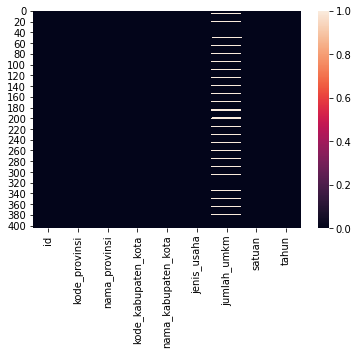

In [68]:
sns.heatmap(data.isnull())
plt.show()

In [69]:
data['jumlah_umkm'] = data['jumlah_umkm'].fillna(data['jumlah_umkm'].mean())

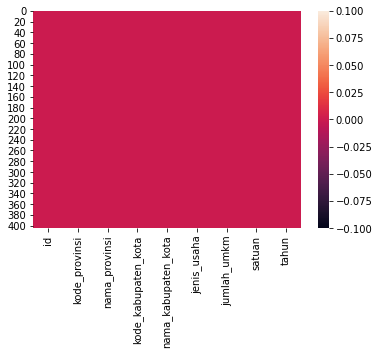

In [70]:
sns.heatmap(data.isnull())
plt.show()

In [71]:
data.dtypes.to_frame() # cek type data

,0
id,int64
kode_provinsi,int64
nama_provinsi,object
kode_kabupaten_kota,int64
nama_kabupaten_kota,object
jenis_usaha,object
jumlah_umkm,float64
satuan,object
tahun,int64


In [72]:
data.info() # getting information bout the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   405 non-null    int64  
 1   kode_provinsi        405 non-null    int64  
 2   nama_provinsi        405 non-null    object 
 3   kode_kabupaten_kota  405 non-null    int64  
 4   nama_kabupaten_kota  405 non-null    object 
 5   jenis_usaha          405 non-null    object 
 6   jumlah_umkm          405 non-null    float64
 7   satuan               405 non-null    object 
 8   tahun                405 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 28.6+ KB


In [73]:
data.describe() # cek statistical measure

,id,kode_provinsi,kode_kabupaten_kota,jumlah_umkm,tahun
count,405.000000,405.0,405.000000,405.000000,405.0
mean,203.000000,32.0,3231.333333,15.274238,2020.0
std,117.057678,0.0,31.240444,25.365440,0.0
min,1.000000,32.0,3201.000000,0.000000,2020.0
25%,102.000000,32.0,3207.000000,1.000000,2020.0
50%,203.000000,32.0,3214.000000,7.000000,2020.0
75%,304.000000,32.0,3273.000000,15.274238,2020.0
max,405.000000,32.0,3279.000000,201.000000,2020.0


In [74]:
data.describe(include='all') # cek statistical measure

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_usaha,jumlah_umkm,satuan,tahun
count,405.000000,405.0,405,405.000000,405,405,405.000000,405,405.0
unique,NaN,NaN,1,NaN,27,15,NaN,1,NaN
top,NaN,NaN,JAWA BARAT,NaN,KOTA BANDUNG,MAKANAN,NaN,UNIT,NaN
freq,NaN,NaN,405,NaN,15,27,NaN,405,NaN
mean,203.000000,32.0,NaN,3231.333333,NaN,NaN,15.274238,NaN,2020.0
std,117.057678,0.0,NaN,31.240444,NaN,NaN,25.365440,NaN,0.0
min,1.000000,32.0,NaN,3201.000000,NaN,NaN,0.000000,NaN,2020.0
25%,102.000000,32.0,NaN,3207.000000,NaN,NaN,1.000000,NaN,2020.0
50%,203.000000,32.0,NaN,3214.000000,NaN,NaN,7.000000,NaN,2020.0
75%,304.000000,32.0,NaN,3273.000000,NaN,NaN,15.274238,NaN,2020.0


# **Data Analysis**

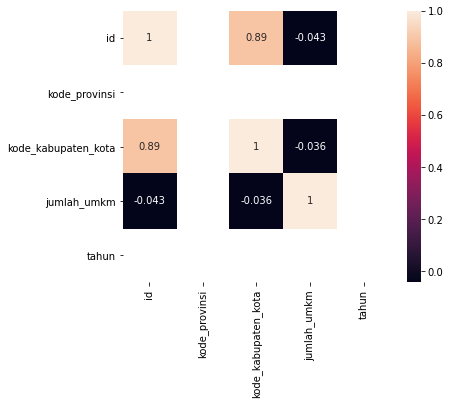

In [75]:
# correlation matrix
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

# **Univariate Analysis**

### **Apa bentuk distribusi dari Jumlah UMKM?**

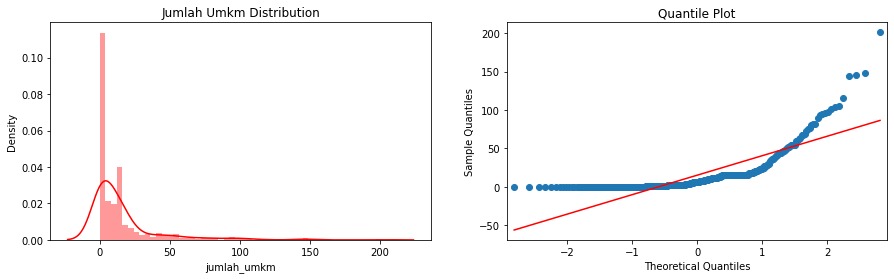

In [76]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['jumlah_umkm'], 
    ax=ax1 , 
    color ='red'
)

ax1.set(title='Jumlah Umkm Distribution')

qqplot(
    data['jumlah_umkm'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya ialah **Skewed Right**.

### **Apa bentuk distribusi dari Kode Kabupaten Dan Kota?**

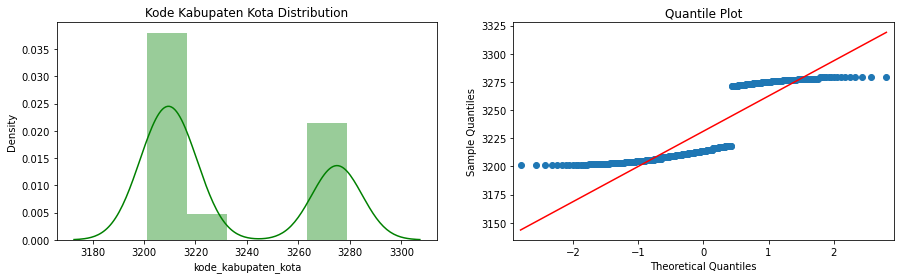

In [77]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['kode_kabupaten_kota'], 
    ax=ax1 , 
    color ='green'
)

ax1.set(title='Kode Kabupaten Kota Distribution')

qqplot(
    data['kode_kabupaten_kota'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya ialah **Skewed Right**.

### **Apa bentuk distribusi dari Kode Provinsi?**

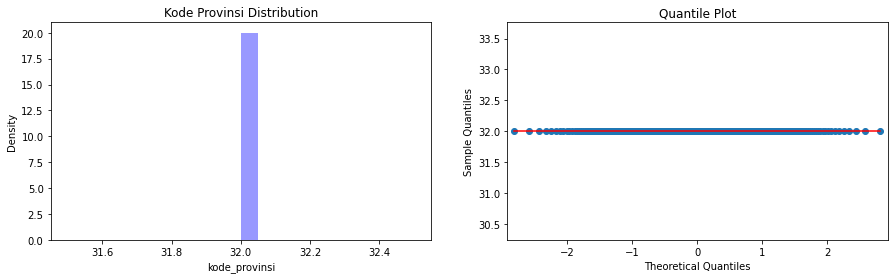

In [78]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['kode_provinsi'], 
    ax=ax1 , 
    color ='blue'
)

ax1.set(title='Kode Provinsi Distribution')

qqplot(
    data['kode_provinsi'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya ialah **Normal Distribution**.

### **Apa bentuk distribusi dari Tahun?**

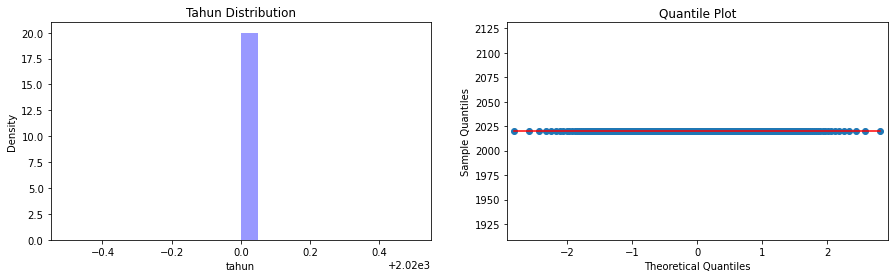

In [79]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['tahun'], 
    ax=ax1 , 
    color ='blue'
)

ax1.set(title='Tahun Distribution')

qqplot(
    data['tahun'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya ialah **Normal Distribution**.

In [80]:
# checking skewness value 
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed

skew_value = data.skew().sort_values(ascending=False)
skew_value

jumlah_umkm            3.246710
kode_kabupaten_kota    0.658582
id                     0.000000
kode_provinsi          0.000000
tahun                  0.000000
dtype: float64

# **Bivariate Analysis**

### **Function**

In [81]:
def bivariate_visualization_bar(data, x, y, color):
    
    """
    Returning Bar Plot Visualization
    for bivariate analysis
    
    data = data
    x = x axis
    y = y axis
    color = color/hue
    title = 'put your title here'
    
    """
    
    fig = px.bar(
        data,
        x=x,
        y=y,
        color=color
    )
    
    return fig.show()

def bivariate_visualization_pie(data, names, title, hole, template='gridon'):
    
    """
    Returning Pie Plot Visualization
    for bivariate analysis
    
    data = data
    names = names
    hole = hole (0.5 / 0,4)
    title = 'put your title here'
    template = template (default 'gridon')
    
    """
    
    fig = px.pie(
        data,
        names=names,
        hole=hole,
        title=title,
        template=template
    )
    
    return fig.show()

def bivariate_visualization_scatter(data, y, x, color, title, template='plotly_dark', trendline='ols'):
    
    """
    Returning Scatter Visualization
    for bivariate analysis
    
    data = data
    y = y axis
    x = x axis
    color = color/hue
    template = template (default 'plotly_dark')
    trendline = trendline (default 'ols')
    
    """
    
    fig = px.scatter(
        data,
        y=y,
        x=x,
        color=color,
        title=title,
        template=template,
        trendline=trendline
    )

    return fig.show()

## **Visualization**

### **Jenis Usaha dan Jumlah UMKM manakah yang terbanyak?**

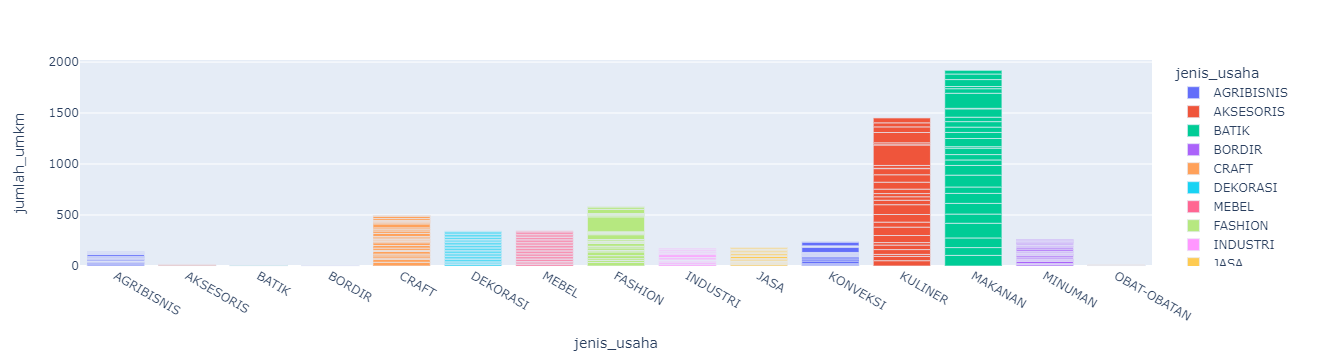

In [82]:
bivariate_visualization_bar(
    data=data,
    x=data['jenis_usaha'],
    y=data['jumlah_umkm'],
    color=data['jenis_usaha']
)

> **Jenis Usaha** terbanyak adalah Usaha **Makanan dan Kuliner**

### **Jenis Usaha dan Jumlah UMKM manakah yang terbanyak dari setiap Kabupaten dan Kota?**

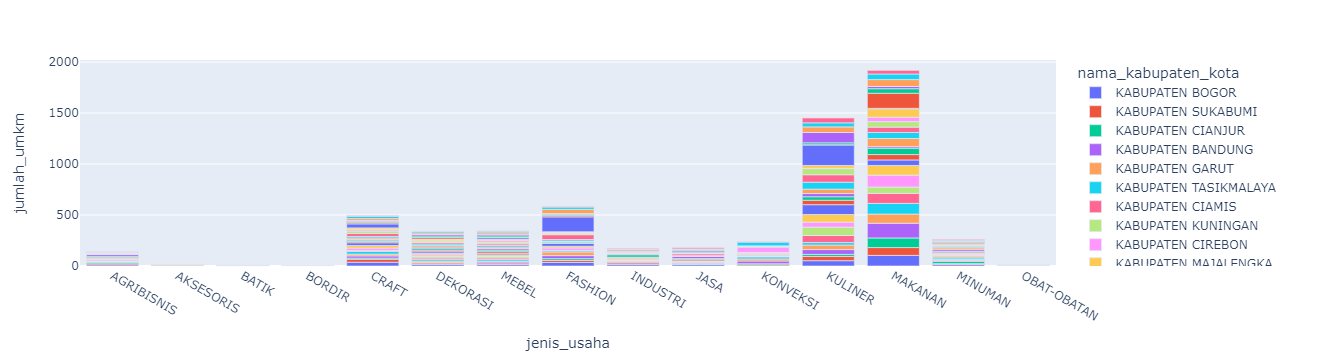

In [83]:
bivariate_visualization_bar(
    data=data,
    x=data['jenis_usaha'],
    y=data['jumlah_umkm'],
    color=data['nama_kabupaten_kota']
)

> **Jenis Usaha** dengan **Jumlah UMKM** terbanyak dari setiap Kabupaten dan Kota adalah Usaha **Makanan dan Kuliner**

### **Jenis Usaha dan Jumlah UMKM manakah yang terbanyak dari setiap Provinsi?**

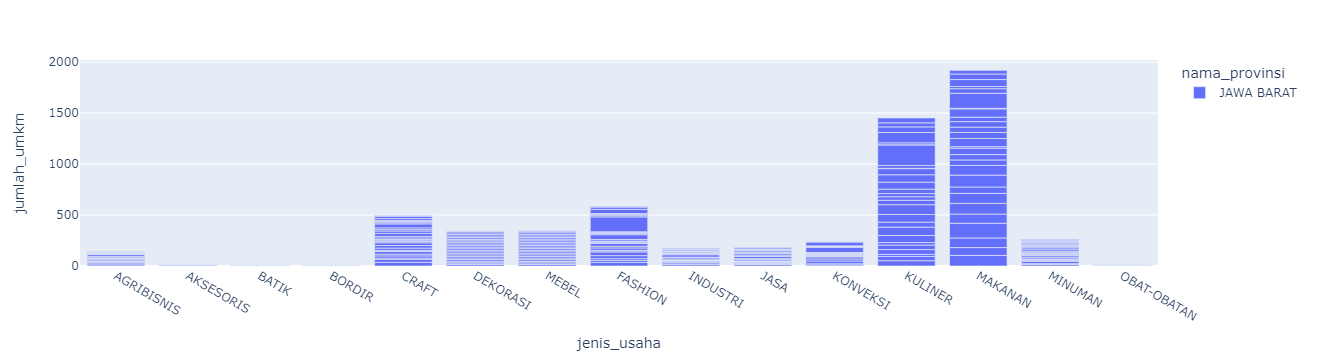

In [84]:
bivariate_visualization_bar(
    data=data,
    x=data['jenis_usaha'],
    y=data['jumlah_umkm'],
    color=data['nama_provinsi']
)

> **Jenis Usaha** dengan **Jumlah UMKM** terbanyak adalah **Makanan** dan **Kuliner**, dominan berasal dari **Provinsi Jawa Barat**.

### **Jenis Usaha dan Jumlah UMKM manakah yang terbanyak dari setiap Satuan?**

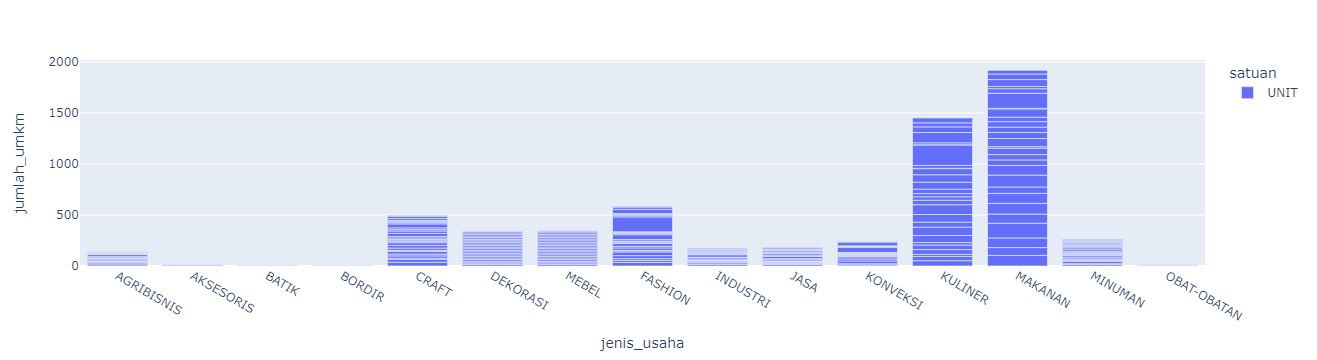

In [85]:
bivariate_visualization_bar(
    data=data,
    x=data['jenis_usaha'],
    y=data['jumlah_umkm'],
    color=data['satuan']
)

> **Jenis Usaha** dengan **Jumlah UMKM** terbanyak yaitu Jenis Usaha **Makanan** dan **Fashion** dominan Satuannya adalah **Unit**.

### **Jenis Usaha dan Jumlah UMKM manakah yang terbanyak?**

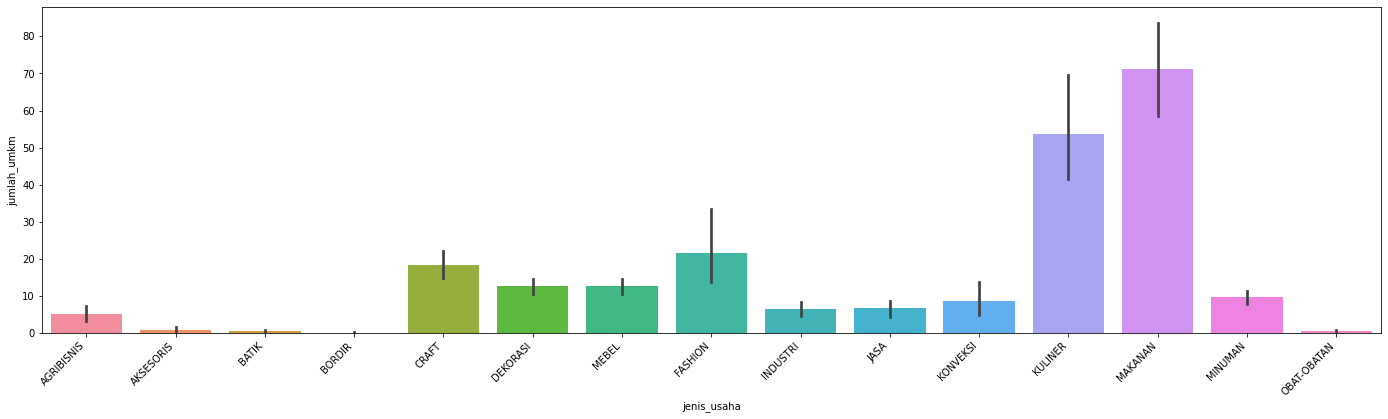

In [86]:
plt.figure(figsize=(24, 6))

viz = sns.barplot(
    x='jenis_usaha', 
    y='jumlah_umkm', 
    data=data,  
    saturation=0.90
)

viz.set_xticklabels(
    viz.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

> **Jenis Usaha** terbanyak adalah Usaha **Makanan dan Kuliner**

### **Nama Kabupaten dan Kota manakah yang memiliki Jumlah UMKM terbanyak?**

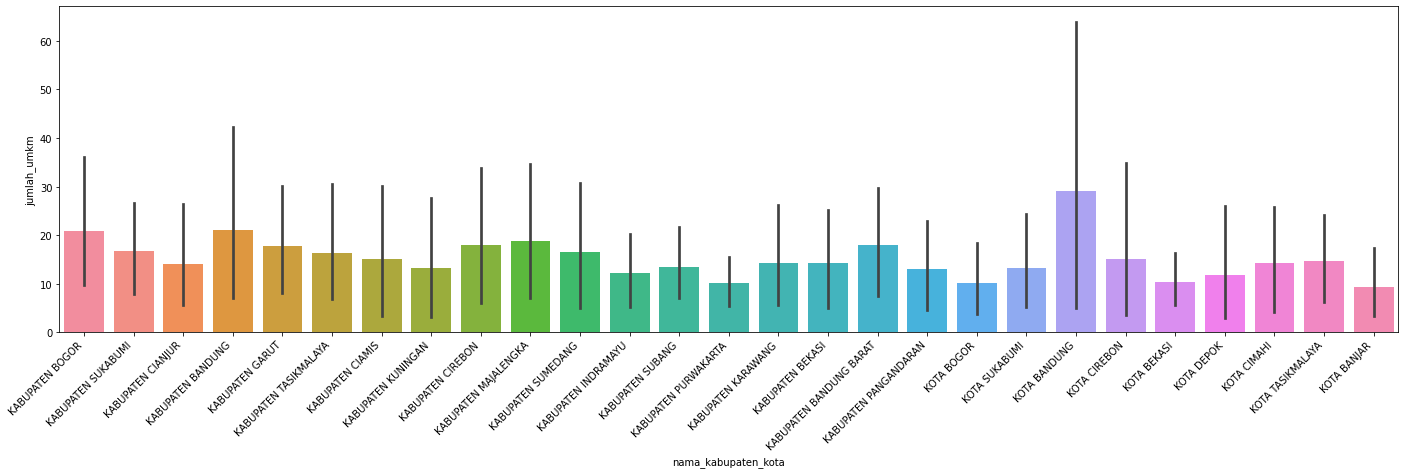

In [87]:
plt.figure(figsize=(24, 6))

viz = sns.barplot(
    x='nama_kabupaten_kota', 
    y='jumlah_umkm', 
    data=data,  
    saturation=0.90
)

viz.set_xticklabels(
    viz.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

> **Kota Bandung** memiliki Jumlah UMKM terbanyak.

### **Berapa persen frekuensi kemunculan Jenis Usaha dalam data?**

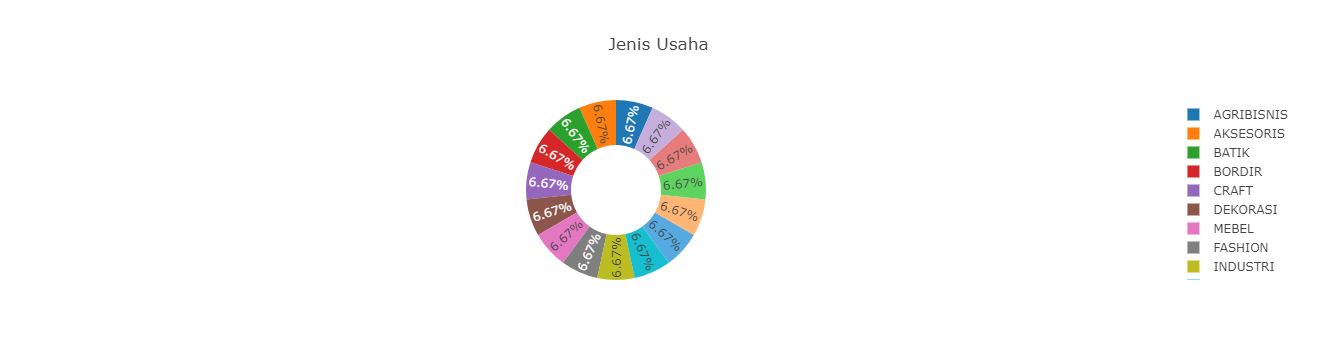

In [88]:
bivariate_visualization_pie(
    data=data,
    names='jenis_usaha',
    title='Jenis Usaha',
    hole=0.5
)

> Frekuensi kemunculan **Jenis Usaha** bernilai sama, yaitu 6.67%.

### **Berapa persen frekuensi kemunculan Nama Kabupaten dan kota dalam data?**

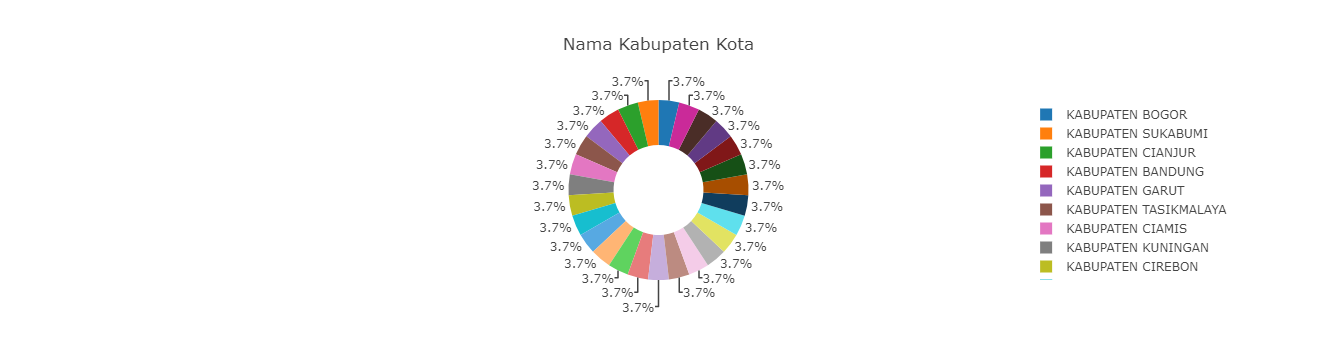

In [89]:
bivariate_visualization_pie(
    data=data,
    names='nama_kabupaten_kota',
    title='Nama Kabupaten Kota',
    hole=0.5
)

> Frekuensi kemunculan **Nama Kabupaten dan Kota** bernilai sama, yaitu 3.7%

### **Berapa persen frekuensi kemunculan Nama Provinsi dalam data?**

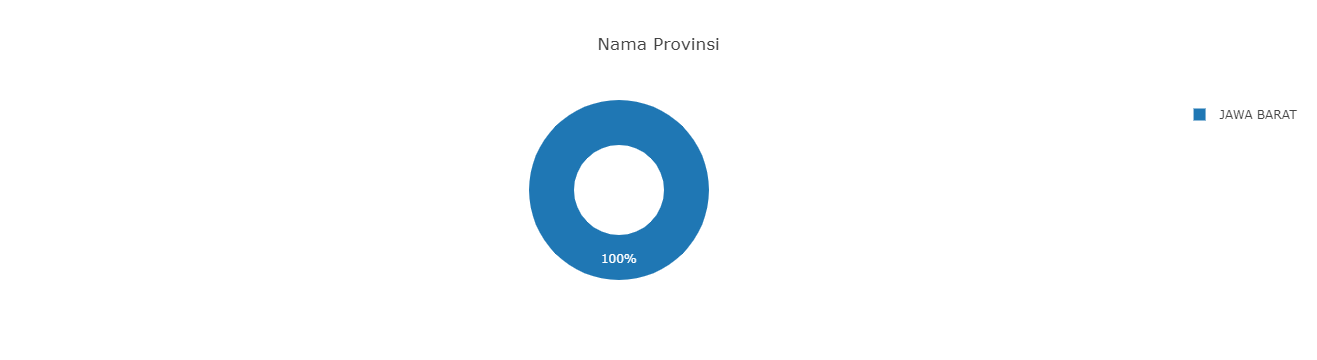

In [90]:
bivariate_visualization_pie(
    data=data,
    names='nama_provinsi',
    title='Nama Provinsi',
    hole=0.5
)

> Kemunculan Nama Provinsi **Jawa Barat** ialah 100%.

### **Berapa persen frekuensi kemunculan Satuan Unit dalam data?**

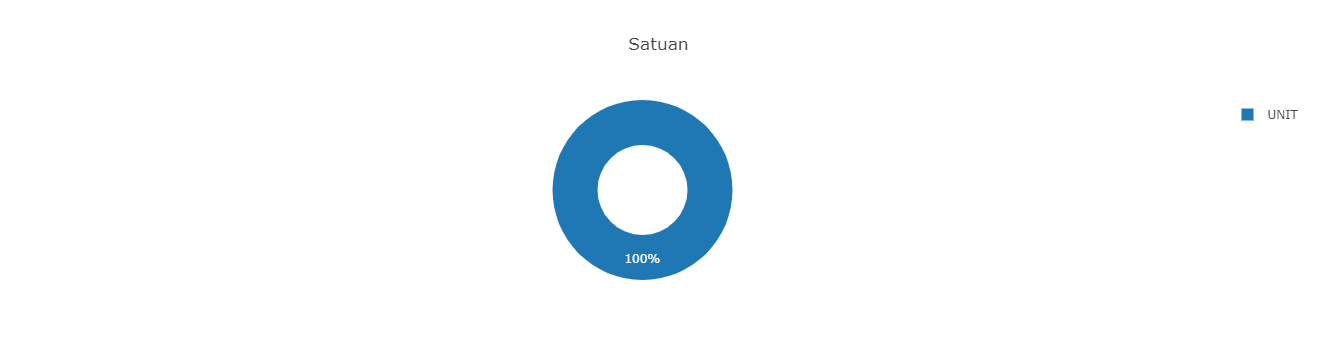

In [91]:
bivariate_visualization_pie(
    data=data,
    names='satuan',
    title='Satuan',
    hole=0.5
)

> Kemunculan Satuan **Unit** ialah 100%.

### **Jenis Usaha manakah yang memiliki Jumlah UMKM terbanyak dari setiap Kabupaten dan Kota?**

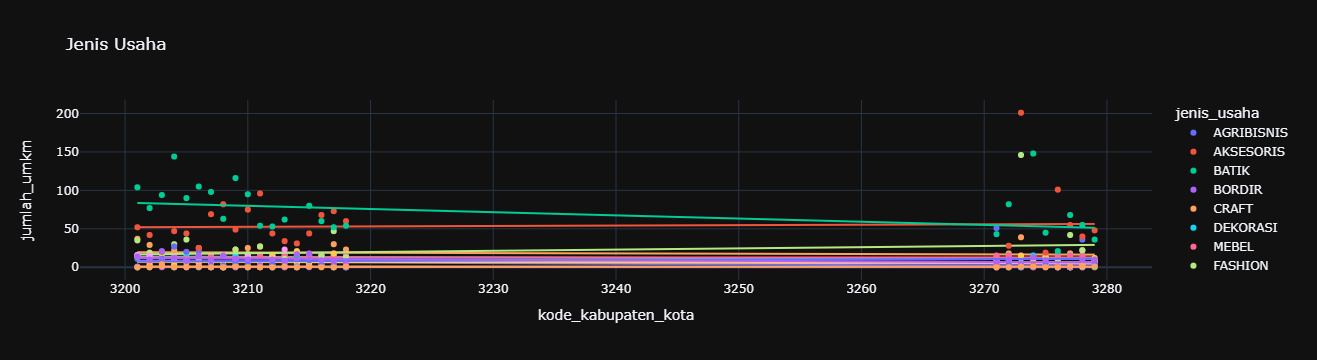

In [92]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='jenis_usaha',
    title='Jenis Usaha'
)

> Jenis Usaha yang memiliki Jumlah UMKM terbanyak dari setiap **Kabupaten dan Kota** ialah Jenis Usaha **Kuliner** dan **Makanan**.

### **Kabupaten dan Kota manakah yang memiliki Jumlah UMKM terbanyak?**

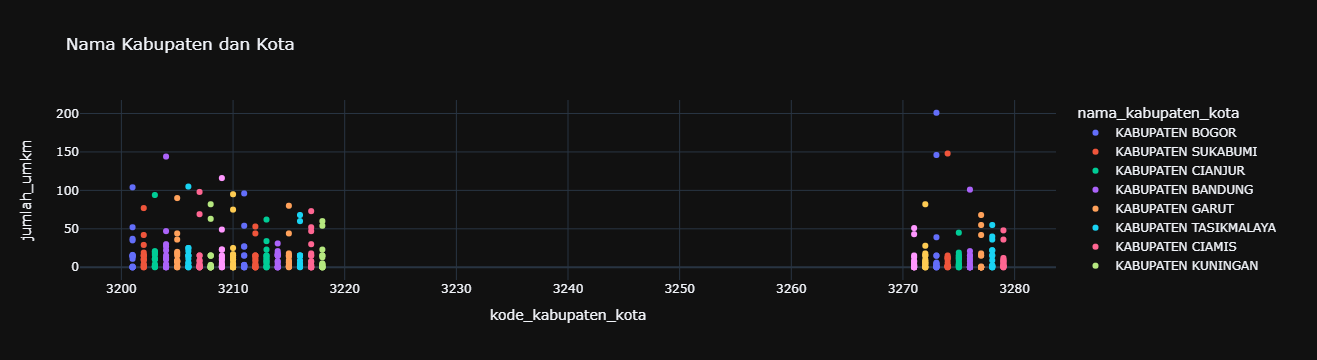

In [93]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='nama_kabupaten_kota',
    title='Nama Kabupaten dan Kota'
)

> Kabupaten dan Kota yang memiliki **Jumlah UMKM** terbanyak ialah **Kota Bandung** dan **Kabupaten Bandung**.

### **Provinsi Manakah yang memiliki Jumlah UMKM terbanyak?**

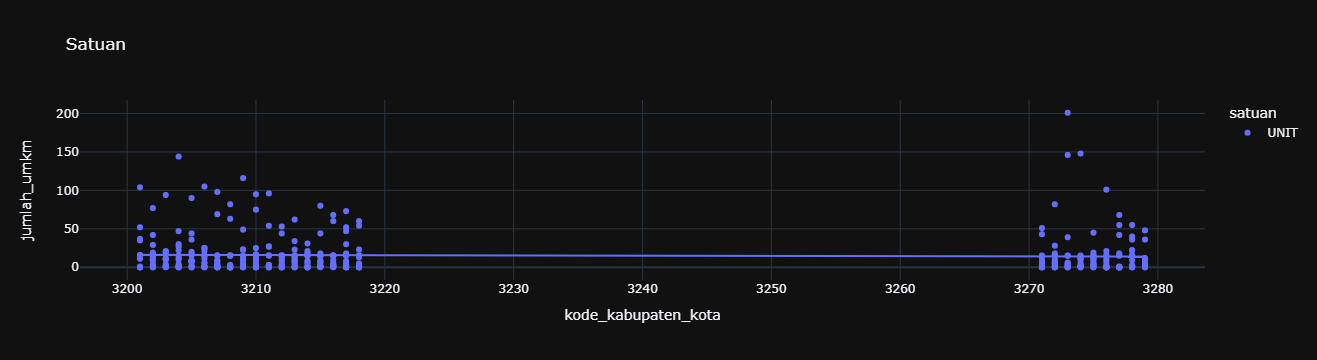

In [95]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='satuan',
    title='Satuan'
)

> Provinsi yang memiliki **Jumlah UMKM** terbanyak ialah **Provinsi Jawa Barat**.

# **Multivariate Analysis**

### **Jenis Usaha dalam Multivariate Plotting**

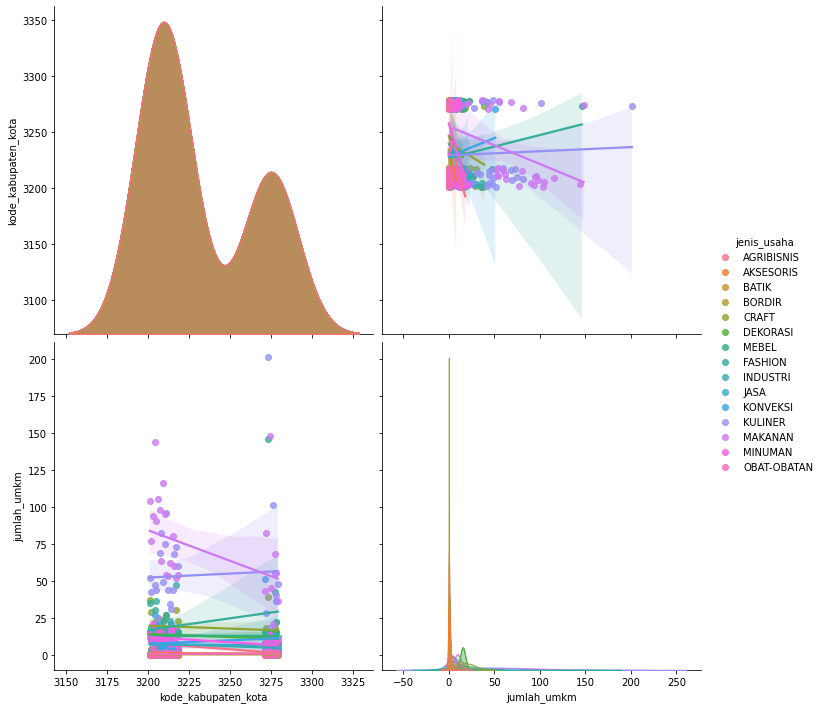

In [96]:
sns.pairplot(
    data=data, 
    vars=['kode_kabupaten_kota', 'jumlah_umkm'], 
    hue='jenis_usaha', 
    kind='reg', 
    diag_kind='kde', 
    size=5, 
    palette='husl'
)

plt.show()

### **Pairplot All Data**

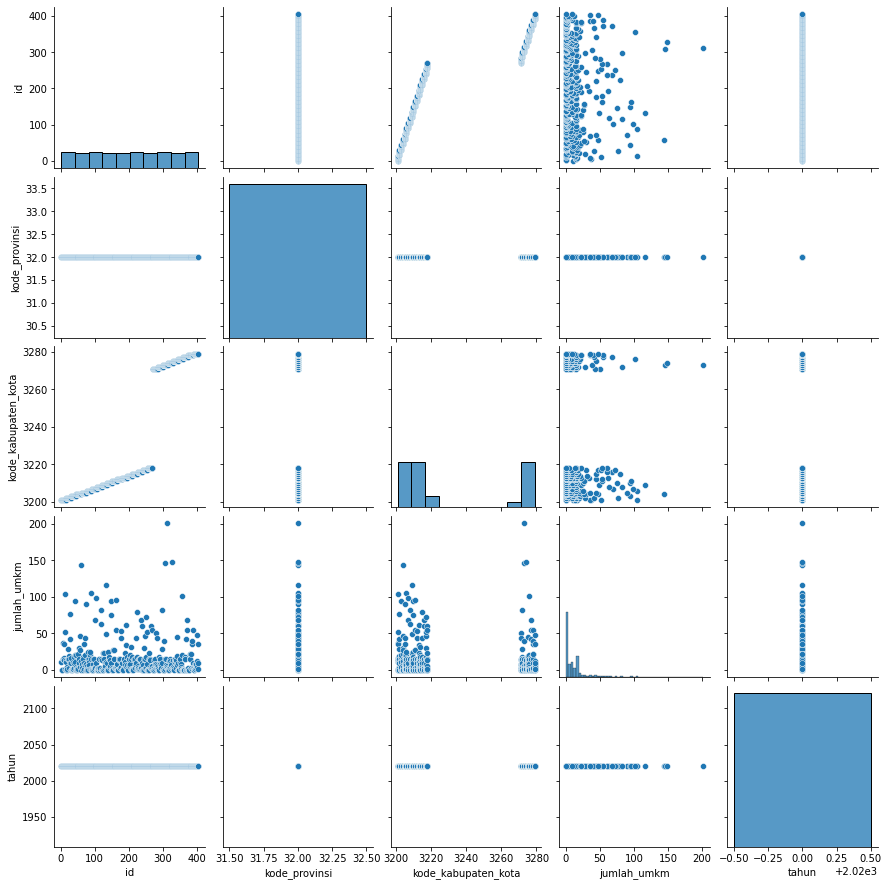

In [97]:
sns.pairplot(data)

# **Kesimpulan:**

* Data memiliki **405 baris** dan **9 kolom**.
* Data tidak memiliki nilai kosong atau **NaN**.
* Data memiliki **4 tipe object data** dan **5 tipe numeric data**.
* Data memiliki **null value**, tetapi nilainya tidak terlalu besar, jadi masih bisa di handle.
* Data Numeric diatas memiliki 2 data yang **Skewed/Miring** yaitu **jumlah_umkm dan kode_kabupaten_kota** dan 3 data berbentuk **Normal Distribution** yaitu **kode_provinsi, id, dan tahun**.
* Data bertipe **object** memiliki frekuensi kemunculan yang sama.

Data diatas menunjukan Jenis Usaha Kuliner di Kota Bandung, Makanan di Kota Cirebon, dan Fashion di Kota Bandung memiliki Jumlah UMKM tertinggi dalam data, hal ini dikarenakan usaha Kuliner, Makanan, dan Fashion lebih di butuhkan di dalam masa-masa pandemi saat ini.

# **Encoding**

In [98]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        label_encoder.fit_transform(list(data[i].values))
        data[i] = label_encoder.transform(data[i].values)
        
        for j in data.columns:
            if data[j].dtype == 'int':
                data[j] = data[j].astype('float64')

In [99]:
data, data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   405 non-null    int64  
 1   kode_provinsi        405 non-null    int64  
 2   nama_provinsi        405 non-null    float64
 3   kode_kabupaten_kota  405 non-null    int64  
 4   nama_kabupaten_kota  405 non-null    float64
 5   jenis_usaha          405 non-null    float64
 6   jumlah_umkm          405 non-null    float64
 7   satuan               405 non-null    float64
 8   tahun                405 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 28.6 KB


(      id  kode_provinsi  nama_provinsi  kode_kabupaten_kota  nama_kabupaten_kota  jenis_usaha  \
 0      1             32            0.0                 3201                  3.0          0.0   
 1      2             32            0.0                 3201                  3.0          1.0   
 2      3             32            0.0                 3201                  3.0          2.0   
 3      4             32            0.0                 3201                  3.0          3.0   
 4      5             32            0.0                 3201                  3.0          4.0   
 ..   ...            ...            ...                  ...                  ...          ...   
 400  401             32            0.0                 3279                 19.0          9.0   
 401  402             32            0.0                 3279                 19.0         10.0   
 402  403             32            0.0                 3279                 19.0         11.0   
 403  404           

# **Splitting Data**

In [100]:
X = data.drop(columns=['jumlah_umkm', 'id'])
y = data['jumlah_umkm']

X.shape, y.shape

((405, 7), (405,))

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((324, 7), (81, 7), (324,), (81,))

In [102]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import  RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

# **Model Building**

### **RandomForestRegressor**

In [103]:
pipe_random_forest_regressor = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', RandomForestRegressor())
])

pipe_random_forest_regressor.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', RandomForestRegressor())])

In [104]:
pred_test_rfr = pipe_random_forest_regressor.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_rfr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_rfr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_rfr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_rfr))

Testing R2 Score:  51.43734957300402
Testing RMSE:  20.01778678610181
Testing MAE:  9.9161198317431
Testing MSE:  400.7117878138322


### **DecisionForestRegressor**

In [105]:
pipe_decision_forest_regressor = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', DecisionTreeRegressor())
])

pipe_decision_forest_regressor.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', DecisionTreeRegressor())])

In [106]:
pred_test_dfr = pipe_decision_forest_regressor.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_dfr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_dfr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_dfr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_dfr))

Testing R2 Score:  64.78178256853
Testing RMSE:  17.0470232572275
Testing MAE:  10.124653739612189
Testing MSE:  290.60100193245535


### **LinearRegression**

In [107]:
pipe_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', LinearRegression())
])

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', LinearRegression())])

In [108]:
pred_test_lr = pipe_lr.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_lr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_lr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_lr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_lr))

Testing R2 Score:  7.6444203265526145
Testing RMSE:  27.60555212846152
Testing MAE:  17.18169908150062
Testing MSE:  762.0665083172064


### **KNeighborsRegressor**

In [109]:
pipe_knr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', KNeighborsRegressor())
])

pipe_knr.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', KNeighborsRegressor())])

In [110]:
pred_test_knr = pipe_knr.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_knr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_knr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_knr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_knr))

Testing R2 Score:  27.924313493050068
Testing RMSE:  24.38704964045372
Testing MAE:  15.44890393625389
Testing MSE:  594.728190165954


### **Kesimpulan**

Dikarenakan Data yang kurang memadai, accuracy model juga tidak terlalu baik, dan dikarenakan Model DecisionForestRegressor memiliki Performa yang baik dibandingkan model yang lain, jadi saya akan memakai model DecisionForestRegressor untuk melakukan prediksi.

# **Prediction**

In [111]:
# buat data baru
data_tahun_2021 = data.copy(deep=True)
data_tahun_2021.tahun = 2021

# delete jumlah_umkm dan id
del data_tahun_2021['jumlah_umkm']
del data_tahun_2021['id']

# predict data
jumlah_umkm_tahun_2021 = pipe_decision_forest_regressor.predict(data_tahun_2021)

data_tahun_2021['jumlah_umkm'] = jumlah_umkm_tahun_2021 # buat kolom baru

data_tahun_2021['nama_kabupaten_kota'] = data_copy['nama_kabupaten_kota'] # ubah kolom

data_tahun_2021['jenis_usaha'] = data_copy['jenis_usaha'] # ubah kolom

data_tahun_2021['satuan'] = data_copy['satuan'] # ubah kolom

data_tahun_2021['nama_provinsi'] = data_copy['nama_provinsi'] # ubah kolom

data_tahun_2021 # cek data

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_usaha,satuan,tahun,jumlah_umkm
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,AGRIBISNIS,UNIT,2021,7.0
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,AKSESORIS,UNIT,2021,0.0
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,BATIK,UNIT,2021,0.0
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,BORDIR,UNIT,2021,0.0
4,32,JAWA BARAT,3201,KABUPATEN BOGOR,CRAFT,UNIT,2021,37.0
...,...,...,...,...,...,...,...,...
400,32,JAWA BARAT,3279,KOTA BANJAR,KONVEKSI,UNIT,2021,6.0
401,32,JAWA BARAT,3279,KOTA BANJAR,KULINER,UNIT,2021,40.0
402,32,JAWA BARAT,3279,KOTA BANJAR,MAKANAN,UNIT,2021,36.0
403,32,JAWA BARAT,3279,KOTA BANJAR,MINUMAN,UNIT,2021,9.0


### **Nama Kabupaten dan Kota manakah yang diprediksi memiliki Jumlah UMKM terbanyak di tahun 2021?**

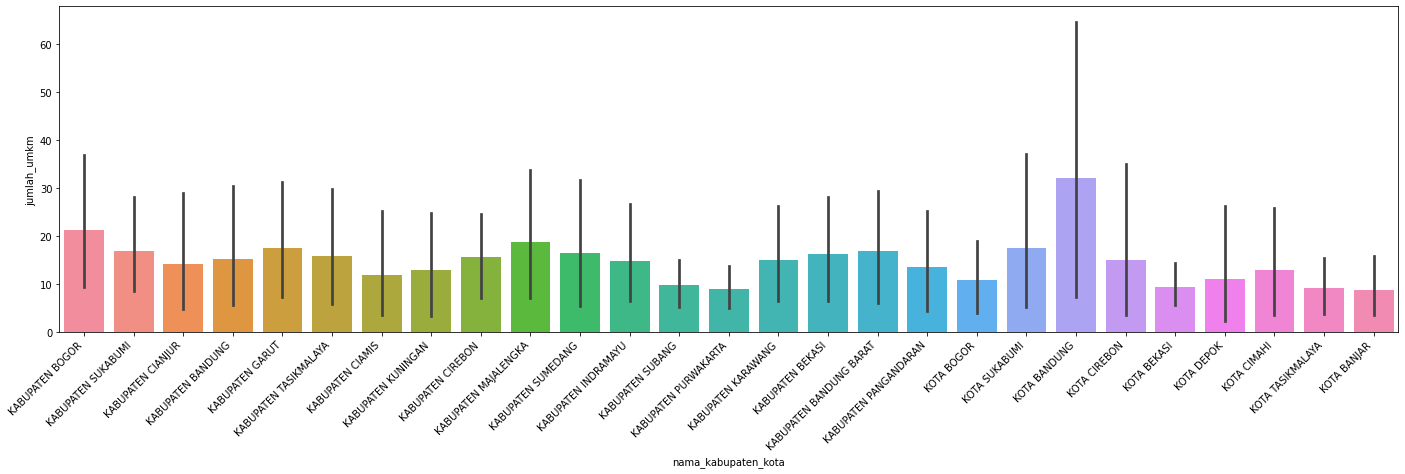

In [112]:
plt.figure(figsize=(24, 6))

viz = sns.barplot(
    x='nama_kabupaten_kota', 
    y='jumlah_umkm', 
    data=data_tahun_2021,  
    saturation=0.90
)

viz.set_xticklabels(
    viz.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

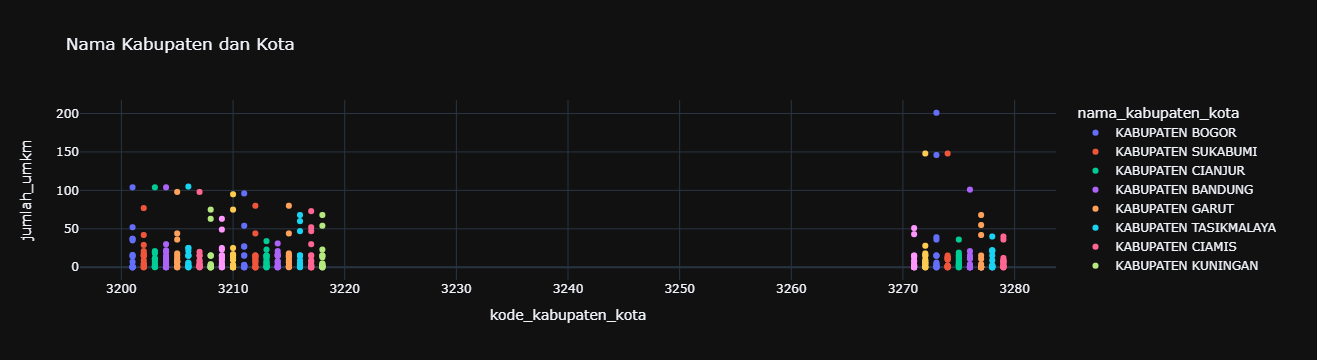

In [113]:
bivariate_visualization_scatter(
    data=data_tahun_2021,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='nama_kabupaten_kota',
    title='Nama Kabupaten dan Kota'
)

> Nama Kabupaten dan Kota yang diprediksi memiliki **Jumlah UMKM** terbanyak di tahun 2021 adalah **Kota Bandung**.

### **Jenis Usaha manakah yang memiliki Jumlah UMKM terbanyak di tahun 2021?**

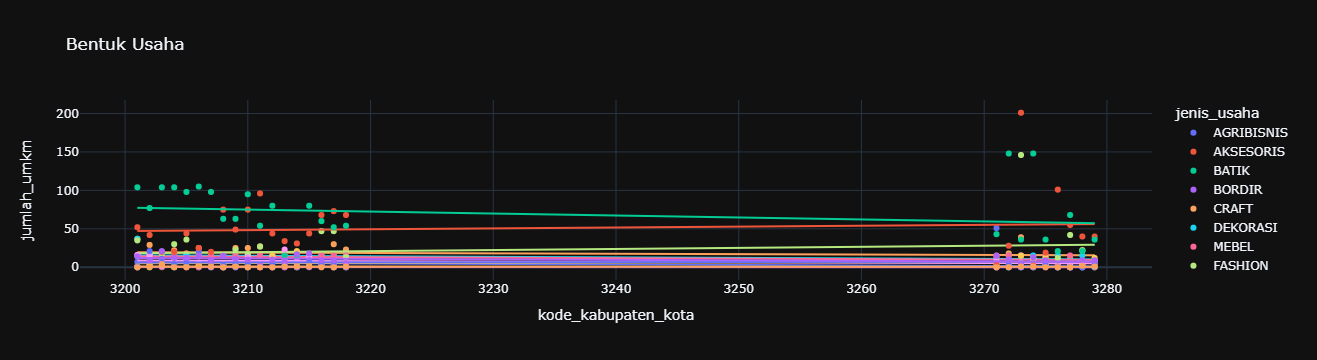

In [114]:
bivariate_visualization_scatter(
    data=data_tahun_2021,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='jenis_usaha',
    title='Bentuk Usaha'
)

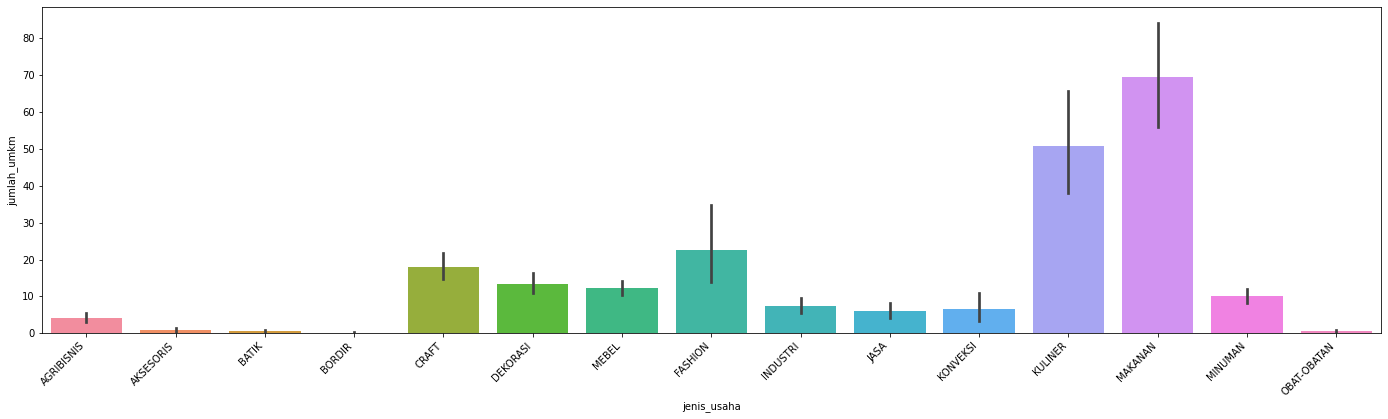

In [115]:
plt.figure(figsize=(24, 6))

viz = sns.barplot(
    x='jenis_usaha', 
    y='jumlah_umkm', 
    data=data_tahun_2021,  
    saturation=0.90
)

viz.set_xticklabels(
    viz.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

> Jenis Usaha yang memiliki **Jumlah UMKM** terbanyak pada tahun 2021 ialah **Makanan**, **Kuliner**, dan **Fashion**.

### **Kesimpulan:**

Hasil prediksi di Tahun 2021, diperkirakan Jenis Usaha Makanan dan Kuliner akan meningkat lebih banyak dibanding Jenis Usaha Fashion, dikarenakan Usaha Makanan dan Kuliner ini, lebih dibutuhkan di saat-saat pandemi seperti ini.  

Usaha Obat"an, Aksesoris, Batik, Agribisnis dan Bordir memiliki penurunan drastis, karena Jenis Usaha tersebut tidak terlalu diperlukan atau di jual belikan secara luas dikarenakan PSBB dan PPKM di setiap wilayah. Hal ini dapat di minimalisir dengan berjualan maupun menawarkan jasa secara online di toko" online seperti Tokopedia, Shopee, dan lainnya.

Sedangkan Jenis Usaha Makanan, Kuliner, dan Fashion dapat di jual secara online di saat-saat pandemi seperti ini, contohnya Usaha Makanan seperti Frozen Food, Usaha Kuliner Seperti Baso Aci, dan Fashion seperti Baju yang dapat di kirim melalui Jasa Pengiriman seperti Gojek dan Grab, ataupun jasa" pengiriman lainnya.

In [116]:
data_tahun_2021

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_usaha,satuan,tahun,jumlah_umkm
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,AGRIBISNIS,UNIT,2021,7.0
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,AKSESORIS,UNIT,2021,0.0
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,BATIK,UNIT,2021,0.0
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,BORDIR,UNIT,2021,0.0
4,32,JAWA BARAT,3201,KABUPATEN BOGOR,CRAFT,UNIT,2021,37.0
...,...,...,...,...,...,...,...,...
400,32,JAWA BARAT,3279,KOTA BANJAR,KONVEKSI,UNIT,2021,6.0
401,32,JAWA BARAT,3279,KOTA BANJAR,KULINER,UNIT,2021,40.0
402,32,JAWA BARAT,3279,KOTA BANJAR,MAKANAN,UNIT,2021,36.0
403,32,JAWA BARAT,3279,KOTA BANJAR,MINUMAN,UNIT,2021,9.0


In [117]:
del data_copy['id']

data_copy

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_usaha,jumlah_umkm,satuan,tahun
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,AGRIBISNIS,11.0,UNIT,2020
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,AKSESORIS,0.0,UNIT,2020
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,BATIK,0.0,UNIT,2020
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,BORDIR,0.0,UNIT,2020
4,32,JAWA BARAT,3201,KABUPATEN BOGOR,CRAFT,37.0,UNIT,2020
...,...,...,...,...,...,...,...,...
400,32,JAWA BARAT,3279,KOTA BANJAR,KONVEKSI,4.0,UNIT,2020
401,32,JAWA BARAT,3279,KOTA BANJAR,KULINER,48.0,UNIT,2020
402,32,JAWA BARAT,3279,KOTA BANJAR,MAKANAN,36.0,UNIT,2020
403,32,JAWA BARAT,3279,KOTA BANJAR,MINUMAN,10.0,UNIT,2020


In [118]:
data_umkm_jenis_usaha_tahun_2021 = pd.concat([data_copy, data_tahun_2021], ignore_index=True) # concat data

data_umkm_jenis_usaha_tahun_2021 # review data

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_usaha,jumlah_umkm,satuan,tahun
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,AGRIBISNIS,11.0,UNIT,2020
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,AKSESORIS,0.0,UNIT,2020
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,BATIK,0.0,UNIT,2020
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,BORDIR,0.0,UNIT,2020
4,32,JAWA BARAT,3201,KABUPATEN BOGOR,CRAFT,37.0,UNIT,2020
...,...,...,...,...,...,...,...,...
805,32,JAWA BARAT,3279,KOTA BANJAR,KONVEKSI,6.0,UNIT,2021
806,32,JAWA BARAT,3279,KOTA BANJAR,KULINER,40.0,UNIT,2021
807,32,JAWA BARAT,3279,KOTA BANJAR,MAKANAN,36.0,UNIT,2021
808,32,JAWA BARAT,3279,KOTA BANJAR,MINUMAN,9.0,UNIT,2021


In [119]:
data_umkm_jenis_usaha_tahun_2021.to_csv("data_umkm_jenis_usaha_tahun_2021.csv", index=False)